In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)

data = pd.read_csv("fifa21_male2.csv")
data

ID             Name  Age  OVA            Nationality  \
0           2      G. Pasquale   33   69                  Italy   
1          16      Luis García   37   71                  Spain   
2          27          J. Cole   33   71                England   
3          36         D. Yorke   36   68  Trinidad &amp; Tobago   
4          41          Iniesta   36   81                  Spain   
...       ...              ...  ...  ...                    ...   
17120  259088       A. Medioub   22   64                 France   
17121  259090       W. Rickard   18   56                  Wales   
17122  259091       C. Barrett   18   56                England   
17123  259101   J. Gazibegović   20   62     Bosnia Herzegovina   
17124  259105  Pablo Rodríguez   18   59                  Spain   

                Club  BOV   BP      Position  \
0            Udinese   71  LWB            LM   
1          KAS Eupen   70   CM    CM CAM CDM   
2      Coventry City   71  CAM  CAM RM RW LM   
3         Sunderland   70   ST           NaN   
4        Vissel Kobe   82  CAM        CM CAM   
...              ...  ...  ...           ...   
17120     CD Tondela   66   CB            CB   
17121        Burnley   58  CAM        CAM CM   
17122        Burnley   56   RB            RB   
17123  SK Sturm Graz   62   RB         RB LB   
17124          Lecce   61   ST            ST   

                                            Player Photo  \
0      https://cdn.sofifa.com/players/000/002/16_120.png   
1      https://cdn.sofifa.com/players/000/016/19_120.png   
2      https://cdn.sofifa.com/players/000/027/16_120.png   
3      https://cdn.sofifa.com/players/000/036/09_120.png   
4      https://cdn.sofifa.com/players/000/041/20_120.png   
...                                                  ...   
17120  https://cdn.sofifa.com/players/259/088/20_120.png   
17121  https://cdn.sofifa.com/players/259/090/20_120.png   
17122  https://cdn.sofifa.com/players/259/091/20_120.png   
17123  https://cdn.sofifa.com/players/259/101/20_120.png   
17124  https://cdn.sofifa.com/players/259/105/20_120.png   

                                              Club Logo  \
0          https://cdn.sofifa.com/teams/55/light_60.png   
1        https://cdn.sofifa.com/teams/2013/light_60.png   
2        https://cdn.sofifa.com/teams/1800/light_60.png   
3         https://cdn.sofifa.com/teams/106/light_60.png   
4      https://cdn.sofifa.com/teams/101146/light_60.png   
...                                                 ...   
17120  https://cdn.sofifa.com/teams/112516/light_60.png   
17121    https://cdn.sofifa.com/teams/1796/light_60.png   
17122    https://cdn.sofifa.com/teams/1796/light_60.png   
17123     https://cdn.sofifa.com/teams/209/light_60.png   
17124     https://cdn.sofifa.com/teams/347/light_60.png   

                                    Flag Photo  POT  \
0          https://cdn.sofifa.com/flags/it.png   69   
1          https://cdn.sofifa.com/flags/es.png   71   
2      https://cdn.sofifa.com/flags/gb-eng.png   71   
3          https://cdn.sofifa.com/flags/tt.png   82   
4          https://cdn.sofifa.com/flags/es.png   81   
...                                        ...  ...   
17120      https://cdn.sofifa.com/flags/fr.png   69   
17121  https://cdn.sofifa.com/flags/gb-wls.png   66   
17122  https://cdn.sofifa.com/flags/gb-eng.png   67   
17123      https://cdn.sofifa.com/flags/ba.png   73   
17124      https://cdn.sofifa.com/flags/es.png   74   

                       Team & Contract Height  Weight   foot  Growth  \
0                  Udinese 2008 ~ 2016   6'0"  181lbs   Left       0   
1                KAS Eupen 2014 ~ 2019  5'10"  143lbs  Right       0   
2            Coventry City 2016 ~ 2020   5'9"  161lbs  Right       0   
3                      Sunderland 2009  5'11"  165lbs  Right      14   
4              Vissel Kobe 2018 ~ 2021   5'7"  150lbs  Right       0   
...                                ...    ...     ...    ...     ...   
17120  CD Tondela Jun 30, 2021 On 

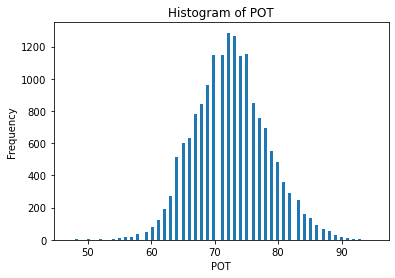

In [66]:
# Create a histogram with 100 bins
plt.hist(data["POT"], bins=100)

# Add titles and labels
plt.title('Histogram of POT')
plt.xlabel('POT')
plt.ylabel('Frequency')
plt.show()

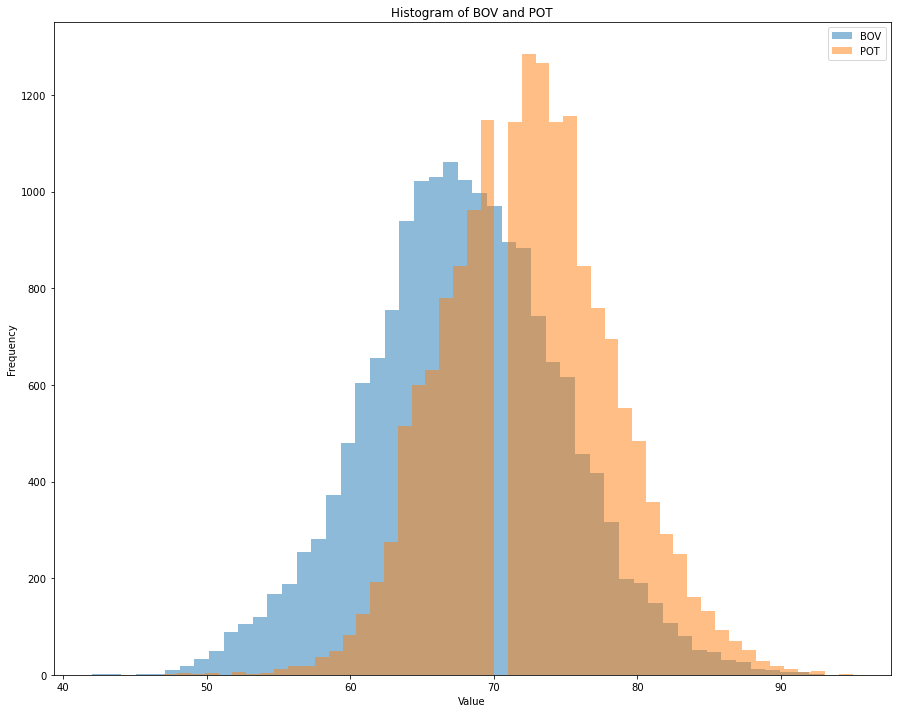

In [71]:
plt.figure(figsize=(15, 12))

# Create a histogram of both datasets on the same chart
plt.hist(data["BOV"], bins=50, alpha=0.5, label='BOV')
plt.hist(data["POT"], bins=50, alpha=0.5, label='POT')

# Add title and labels
plt.title('Histogram of BOV and POT')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [3]:
col_list = data.columns.to_list()

print(col_list)

['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position', 'Player Photo', 'Club Logo', 'Flag Photo', 'POT', 'Team & Contract', 'Height', 'Weight', 'foot', 'Growth', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause', 'Contract', 'Attacking', 'Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling', 'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement', 'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance', 'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots', 'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle', 'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats', 'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Hits', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', '

In [4]:
for col in data.columns:
    print(col,"| number of unique values: ",data[col].nunique())

ID | number of unique values:  17125
Name | number of unique values:  16176
Age | number of unique values:  30
OVA | number of unique values:  50
Nationality | number of unique values:  167
Club | number of unique values:  917
BOV | number of unique values:  50
BP | number of unique values:  15
Position | number of unique values:  622
Player Photo | number of unique values:  17125
Club Logo | number of unique values:  918
Flag Photo | number of unique values:  167
POT | number of unique values:  47
Team & Contract | number of unique values:  9822
Height | number of unique values:  21
Weight | number of unique values:  57
foot | number of unique values:  2
Growth | number of unique values:  28
Joined | number of unique values:  1953
Loan Date End | number of unique values:  38
Value | number of unique values:  216
Wage | number of unique values:  142
Release Clause | number of unique values:  1200
Contract | number of unique values:  434
Attacking | number of unique values:  366
Crossin

In [5]:
data = data.drop(["ID","Player Photo","Club Logo","Flag Photo","Gender",'Joined','Loan Date End','Contract','Team & Contract'],axis=1)

In [6]:
#Dealing with euros

# Replace K with 000
data["Value"] = data["Value"].str.replace("K", "000")
data["Hits"] = data["Hits"].str.replace("K", "000")
data["Wage"] = data["Wage"].str.replace("K", "000")
data["Release Clause"] = data["Release Clause"].str.replace("K", "000")

# Replace M with 000000
data["Value"] = data["Value"].str.replace("M", "000000")
data["Wage"] = data["Wage"].str.replace("M", "000000")
data["Release Clause"] = data["Release Clause"].str.replace("M", "000000")

# Remove .
data["Value"] = data["Value"].str.replace(".", "")
data["Hits"] = data["Hits"].str.replace(".", "")
data["Wage"] = data["Wage"].str.replace(".", "")
data["Release Clause"] = data["Release Clause"].str.replace(".", "")

# Remove €
data["Value"] = data["Value"].str.replace("€", "")
data["Wage"] = data["Wage"].str.replace("€", "")
data["Release Clause"] = data["Release Clause"].str.replace("€", "")

# Convert the column to numeric values
data["Value"] = pd.to_numeric(data["Value"])
data["Hits"] = pd.to_numeric(data["Hits"])
data["Wage"] = pd.to_numeric(data["Wage"])
data["Release Clause"] = pd.to_numeric(data["Release Clause"])

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value   Wage  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   7000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   7000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000  15000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0      0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000  12000   
...    ...           ...  ...    ...     ...    ...     ...       ...    ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   2000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   3000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   2000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   3000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71     58.0    338         73   65.0           60   
1                 76     68.0    369         69   79.0           79   
2                 77     75.0    387         79   84.0           77   
3                 80      NaN    255         68    NaN           46   
4                 90     79.0    408         85   80.0           70   
...              ...      ...    ...        ...    ...          ...   
17120             47     26.0    193         44   26.0           33   
17121             64     41.0    264         57   42.0           50   
17122             42     34.0    212         52   43.0           34   
17123             60     23.0    258         55   43.0           46   
17124             45     54.0    235         57   45.0           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       176           

In [7]:
columns_to_apply = ["W/F", 'SM', 'IR']+list(data.loc[:, "LS":"GK"].columns)

# loop through the columns and apply the functions
for col in columns_to_apply:
    # extract the numeric values from the column and assign to a new column
    data[col] = data[col].str.extract('(\d+)', expand=False).astype(int)
    
    # check if the column has a '+' sign and sum the values if true
    if '+' in data[col]:
        data[col] = data[col].str.split('+').apply(lambda x: sum(map(int, x)))

# display the updated DataFrame
data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value   Wage  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   7000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   7000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000  15000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0      0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000  12000   
...    ...           ...  ...    ...     ...    ...     ...       ...    ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   2000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   3000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   2000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   3000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71     58.0    338         73   65.0           60   
1                 76     68.0    369         69   79.0           79   
2                 77     75.0    387         79   84.0           77   
3                 80      NaN    255         68    NaN           46   
4                 90     79.0    408         85   80.0           70   
...              ...      ...    ...        ...    ...          ...   
17120             47     26.0    193         44   26.0           33   
17121             64     41.0    264         57   42.0           50   
17122             42     34.0    212         52   43.0           34   
17123             60     23.0    258         55   43.0           46   
17124             45     54.0    235         57   45.0           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       176           

In [8]:
cols_to_convert = []
for col in data.columns:
    if data[col].dtype == 'float64' and data[col].apply(lambda x: x.is_integer()).any():
        cols_to_convert.append(col)
        
for col in cols_to_convert:
    data[col] = data[col].replace([np.nan, np.inf, -np.inf], [0, np.iinfo(np.int32).max, np.iinfo(np.int32).min])
    data[col] = pd.to_numeric(data[col], downcast='integer', errors='coerce')

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT Height  Weight   foot  Growth     Value   Wage  \
0      LWB            LM   69   6'0"  181lbs   Left       0    625000   7000   
1       CM    CM CAM CDM   71  5'10"  143lbs  Right       0    600000   7000   
2      CAM  CAM RM RW LM   71   5'9"  161lbs  Right       0  11000000  15000   
3       ST           NaN   82  5'11"  165lbs  Right      14         0      0   
4      CAM        CM CAM   81   5'7"  150lbs  Right       0  55000000  12000   
...    ...           ...  ...    ...     ...    ...     ...       ...    ...   
17120   CB            CB   69   6'6"  165lbs  Right       5    550000   2000   
17121  CAM        CAM CM   66  5'10"  170lbs  Right      10    130000   3000   
17122   RB            RB   67   5'9"  154lbs  Right      11    130000   2000   
17123   RB         RB LB   73   5'9"  148lbs  Right      11    475000   3000   
17124   ST            ST   74  5'10"  154lbs  Right      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71       58    338         73     65           60   
1                 76       68    369         69     79           79   
2                 77       75    387         79     84           77   
3                 80        0    255         68      0           46   
4                 90       79    408         85     80           70   
...              ...      ...    ...        ...    ...          ...   
17120             47       26    193         44     26           33   
17121             64       41    264         57     42           50   
17122             42       34    212         52     43           34   
17123             60       23    258         55     43           46   
17124             45       54    235         57     45           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       176           

In [9]:
#convert height and weight
def convert_height(height):
    # extract the feet value from the string
    feet = int(height.split("'")[0])
    # extract the inches value from the string
    inches = int(height.split("'")[1].replace('"', ''))
    # convert feet and inches to total inches
    total_inches = feet * 12 + inches
    return total_inches

def convert_weight(weight):
    # extract the pounds value from the string
    pounds = int(weight.split('lbs')[0])
    return pounds

# apply the conversion functions to the columns "Height" and "Weight"
data['Height'] = data['Height'].apply(convert_height)
data['Weight']= data['Weight'].apply(convert_weight)

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT  Height  Weight   foot  Growth     Value   Wage  \
0      LWB            LM   69      72     181   Left       0    625000   7000   
1       CM    CM CAM CDM   71      70     143  Right       0    600000   7000   
2      CAM  CAM RM RW LM   71      69     161  Right       0  11000000  15000   
3       ST           NaN   82      71     165  Right      14         0      0   
4      CAM        CM CAM   81      67     150  Right       0  55000000  12000   
...    ...           ...  ...     ...     ...    ...     ...       ...    ...   
17120   CB            CB   69      78     165  Right       5    550000   2000   
17121  CAM        CAM CM   66      70     170  Right      10    130000   3000   
17122   RB            RB   67      69     154  Right      11    130000   2000   
17123   RB         RB LB   73      69     148  Right      11    475000   3000   
17124   ST            ST   74      70     154  Right      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71       58    338         73     65           60   
1                 76       68    369         69     79           79   
2                 77       75    387         79     84           77   
3                 80        0    255         68      0           46   
4                 90       79    408         85     80           70   
...              ...      ...    ...        ...    ...          ...   
17120             47       26    193         44     26           33   
17121             64       41    264         57     42           50   
17122             42       34    212         52     43           34   
17123             60       23    258         55     43           46   
17124             45       54    235         57     45           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       17

In [10]:
numeric = data.select_dtypes(include=[np.number])

In [11]:
numeric

Age  OVA  BOV  POT  Height  Weight  Growth     Value   Wage  \
0       33   69   71   69      72     181       0    625000   7000   
1       37   71   70   71      70     143       0    600000   7000   
2       33   71   71   71      69     161       0  11000000  15000   
3       36   68   70   82      71     165      14         0      0   
4       36   81   82   81      67     150       0  55000000  12000   
...    ...  ...  ...  ...     ...     ...     ...       ...    ...   
17120   22   64   66   69      78     165       5    550000   2000   
17121   18   56   58   66      70     170      10    130000   3000   
17122   18   56   56   67      69     154      11    130000   2000   
17123   20   62   62   73      69     148      11    475000   3000   
17124   18   59   61   74      70     154      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71       58    338         73     65           60   
1                 76       68    369         69     79           79   
2                 77       75    387         79     84           77   
3                 80        0    255         68      0           46   
4                 90       79    408         85     80           70   
...              ...      ...    ...        ...    ...          ...   
17120             47       26    193         44     26           33   
17121             64       41    264         57     42           50   
17122             42       34    212         52     43           34   
17123             60       23    258         55     43           46   
17124             45       54    235         57     45           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       176            59            62   
4                83            90       346            61            56   
...             ...           ...       ...           ...           ...   
17120            34            56       243            52            55   
17121            61            54       298            61            63   
17122            36            47       308            66            61   
17123            57            57       349            72            70   
17124            30            55       317            68            72   

       Agility  Reactions  Balance  Power  Shot Power  Jumping  Stamina  \
0           68         69       68    347          74       68       69   
1           62         65       72    324          75       54       64   
2           71         59       75    284          72       58       29   
3            0         55        0    239          63        0       51   
4           79         75       75    297          67       40       58   
...        ...        ...      ...    ...         ...      ..

In [12]:
categoric = data.select_dtypes(include=[np.object])

In [13]:
categoric

Name            Nationality           Club   BP  \
0          G. Pasquale                  Italy        Udinese  LWB   
1          Luis García                  Spain      KAS Eupen   CM   
2              J. Cole                England  Coventry City  CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4              Iniesta                  Spain    Vissel Kobe  CAM   
...                ...                    ...            ...  ...   
17120       A. Medioub                 France     CD Tondela   CB   
17121       W. Rickard                  Wales        Burnley  CAM   
17122       C. Barrett                England        Burnley   RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB   
17124  Pablo Rodríguez                  Spain          Lecce   ST   

           Position   foot     A/W     D/W  
0                LM   Left  Medium    High  
1        CM CAM CDM  Right  Medium  Medium  
2      CAM RM RW LM  Right  Medium     Low  
3               NaN  Right     NaN     NaN  
4            CM CAM  Right    High  Medium  
...             ...    ...     ...     ...  
17120            CB  Right  Medium  Medium  
17121        CAM CM  Right  Medium  Medium  
17122            RB  Right  Medium  Medium  
17123         RB LB  Right    High  Medium  
17124            ST  Right    High  Medium  

[17125 rows x 8 columns]

In [14]:
null_values = numeric.isnull().sum()

# Print the number of null values in each column
print(null_values)

Age       0
OVA       0
BOV       0
POT       0
Height    0
         ..
LCB       0
CB        0
RCB       0
RB        0
GK        0
Length: 90, dtype: int64


In [15]:
#clean data nuls 
nulls_df=pd.DataFrame(numeric.isna().sum()/len(data)*100).reset_index() #formatar em tabela
nulls_df.columns=['column_name','percent_nulls']
    
columns_to_drop = nulls_df[nulls_df['percent_nulls']>=50]['column_name'].values
numeric = numeric.drop(columns_to_drop, axis=1)

for col in numeric.columns:
    numeric[col] = numeric[col].fillna(np.mean(numeric[col]))

data

Name  Age  OVA            Nationality           Club  BOV  \
0          G. Pasquale   33   69                  Italy        Udinese   71   
1          Luis García   37   71                  Spain      KAS Eupen   70   
2              J. Cole   33   71                England  Coventry City   71   
3             D. Yorke   36   68  Trinidad &amp; Tobago     Sunderland   70   
4              Iniesta   36   81                  Spain    Vissel Kobe   82   
...                ...  ...  ...                    ...            ...  ...   
17120       A. Medioub   22   64                 France     CD Tondela   66   
17121       W. Rickard   18   56                  Wales        Burnley   58   
17122       C. Barrett   18   56                England        Burnley   56   
17123   J. Gazibegović   20   62     Bosnia Herzegovina  SK Sturm Graz   62   
17124  Pablo Rodríguez   18   59                  Spain          Lecce   61   

        BP      Position  POT  Height  Weight   foot  Growth     Value   Wage  \
0      LWB            LM   69      72     181   Left       0    625000   7000   
1       CM    CM CAM CDM   71      70     143  Right       0    600000   7000   
2      CAM  CAM RM RW LM   71      69     161  Right       0  11000000  15000   
3       ST           NaN   82      71     165  Right      14         0      0   
4      CAM        CM CAM   81      67     150  Right       0  55000000  12000   
...    ...           ...  ...     ...     ...    ...     ...       ...    ...   
17120   CB            CB   69      78     165  Right       5    550000   2000   
17121  CAM        CAM CM   66      70     170  Right      10    130000   3000   
17122   RB            RB   67      69     154  Right      11    130000   2000   
17123   RB         RB LB   73      69     148  Right      11    475000   3000   
17124   ST            ST   74      70     154  Right      15    325000   2000   

       Release Clause  Attacking  Crossing  Finishing  Heading Accuracy  \
0                   0        313        75         50                59   
1            11000000        337        68         64                61   
2                   0        337        80         64                41   
3                   0        264        54         70                60   
4            72000000        367        75         69                54   
...               ...        ...       ...        ...               ...   
17120               0        197        35         23                66   
17121          273000        248        50         43                50   
17122          273000        218        55         34                53   
17123          784000        223        62         26                52   
17124          788000        254        32         64                59   

       Short Passing  Volleys  Skill  Dribbling  Curve  FK Accuracy  \
0                 71       58    338         73     65           60   
1                 76       68    369         69     79           79   
2                 77       75    387         79     84           77   
3                 80        0    255         68      0           46   
4                 90       79    408         85     80           70   
...              ...      ...    ...        ...    ...          ...   
17120             47       26    193         44     26           33   
17121             64       41    264         57     42           50   
17122             42       34    212         52     43           34   
17123             60       23    258         55     43           46   
17124             45       54    235         57     45           48   

       Long Passing  Ball Control  Movement  Acceleration  Sprint Speed  \
0                69            71       347            68            74   
1                71            71       305            56            50   
2                69            78       295            48            42   
3                64            77       17

In [16]:
numeric.corr()

Age       OVA       BOV       POT    Height    Weight    Growth  \
Age     1.000000  0.517099  0.456734 -0.237619  0.092935  0.258682 -0.850204   
OVA     0.517099  1.000000  0.985877  0.592268  0.027077  0.151834 -0.595585   
BOV     0.456734  0.985877  1.000000  0.628323  0.015950  0.132560 -0.542890   
POT    -0.237619  0.592268  0.628323  1.000000 -0.021094 -0.039809  0.294499   
Height  0.092935  0.027077  0.015950 -0.021094  1.000000  0.766072 -0.053145   
...          ...       ...       ...       ...       ...       ...       ...   
LCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
CB      0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RCB     0.207569  0.376998  0.400514  0.187047 -0.024907  0.016821 -0.260662   
RB      0.150750  0.406816  0.436492  0.242243 -0.234484 -0.181250 -0.240999   
GK      0.158240  0.097549  0.050935  0.026755  0.348496  0.334569 -0.089024   

           Value      Wage  Release Clause  Attacking  Crossing  Finishing  \
Age     0.089949  0.200851        0.073432   0.183954  0.151022   0.105311   
OVA     0.519528  0.592925        0.573078   0.431238  0.386334   0.304012   
BOV     0.526055  0.592453        0.583340   0.464329  0.400046   0.336488   
POT     0.454159  0.462235        0.524035   0.233866  0.210944   0.173281   
Height -0.002578  0.020740       -0.000397  -0.354000 -0.493419  -0.359231   
...          ...       ...             ...        ...       ...        ...   
LCB     0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
CB      0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
RCB     0.174643  0.223027        0.183727   0.489324  0.488504   0.105631   
RB      0.209256  0.249632        0.224584   0.647000  0.696510   0.289717   
GK      0.036161  0.023661        0.040745  -0.738093 -0.627985  -0.557637   

        Heading Accuracy  Short Passing   Volleys     Skill  Dribbling  \
Age             0.172793       0.176786  0.176261  0.168876   0.039607   
OVA             0.305553       0.492372  0.352460  0.441689   0.350249   
BOV             0.335677       0.533046  0.376928  0.473888   0.388163   
POT             0.137199       0.318544  0.167395  0.265503   0.264651   
Height          0.061263      -0.352632 -0.330186 -0.455071  -0.484958   
...                  ...            ...       ...       ...        ...   
LCB             0.703029       0.661929  0.191176  0.497537   0.414363   
CB              0.703029       0.661929  0.191176  0.497537   0.414363   
RCB             0.703029       0.661929  0.191176  0.497537   0.414363   
RB              0.667142       0.792456  0.352759  0.682541   0.621561   
GK             -0.698657      -0.691746 -0.547457 -0.684169  -0.734537   

           Curve  FK Accuracy  Long Passing  Ball Control  Movement  \
Age     0.168669     0.223884      0.223088      0.121097 -0.055642   
OVA     0.387504     0.369278      0.482655      0.431284  0.302267   
BOV     0.406499     0.387289      0.515422      0.471454  0.335011   
POT     0.209485     0.166233      0.283647      0.292414  0.258243   
Height -0.435017    -0.399550     -0.315305     -0.411104 -0.632736   
...          ...          ...           ...           ...       ...   
LCB     0.342903     0.338474      0.662757      0.545690  0.257200   
CB      0.342903     0.338474      0.662757      0.545690  0.257200   
RCB     0.342903     0.338474      0.662757      0.545690  0.257200   
RB      0.529399     0.498801      0.768279      0.713761  0.505318   
GK     -0.564295    -0.507288     -0.535783     -0.761021 -0.542920   

        Acceleration  Sprint Speed   Agility  Reactions   Balance     Power  \
Age        -0.186610     -0.180717 -0.055110   0.501010 -0.098089  0.310459   
OVA         0.143928      0.153476  0.210835   0.870084  0.088880  0.546417   
BOV         0.179547      0.189491  0.237297   0.870157  0.113947  0.572275   
POT         0.197884      0.197396  0.170358   0.471139  

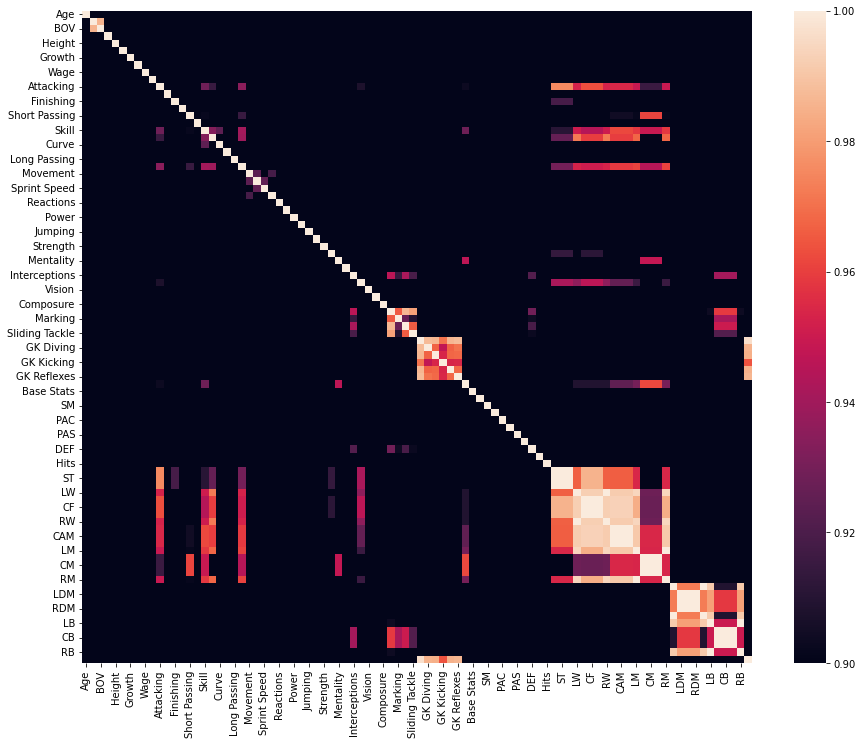

In [17]:
plt.figure(figsize=(15, 12))
sns.heatmap(numeric.corr(),vmin=0.9,vmax=1)
plt.show()

In [18]:
correlation = numeric.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.9:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    numeric = numeric.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(numeric)

The following high-correlation columns should were dropped:  ['OVA', 'Attacking', 'Finishing', 'Short Passing', 'Skill', 'Ball Control', 'Acceleration', 'Long Shots', 'Interceptions', 'Defending', 'Standing Tackle', 'Goalkeeping', 'GK Handling', 'GK Positioning', 'Total Stats', 'LS', 'RS', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LWB', 'CDM', 'RWB', 'LCB', 'RCB']

New numerical data: 


Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

In [19]:
numeric

Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

In [20]:
Y  = numeric["POT"].reset_index(drop=True)
numeric_x = numeric.drop(["POT"],axis=1)

In [21]:
for col in numeric_x.columns:
    numeric_x[col][numeric_x[col] < 0] = 0
    numeric_x[col] = numeric_x[col].replace(0,numeric_x[col].mean())
    arr, lmbda = stats.boxcox(numeric_x[col])
    numeric_x[col] = arr

In [22]:
numeric_x

Age        BOV     Height    Weight    Growth     Value      Wage  \
0      2.333615  56.738223  49.493996  6.821946  2.333367  7.838821  6.238182   
1      2.380795  55.975537  48.240030  6.429831  2.333367  7.826237  6.238182   
2      2.333615  56.738223  47.611580  6.625952  2.333367  8.618379  6.588086   
3      2.369619  55.975537  48.867497  6.666839  4.319479  8.693592  6.428565   
4      2.369619  65.084741  46.351670  6.508606  2.333367  8.976722  6.487957   
...         ...        ...        ...       ...       ...       ...       ...   
17120  2.155150  52.917746  53.233489  6.666839  2.155803  7.799264  5.611854   
17121  2.059924  46.765866  48.240030  6.716713  3.525799  7.320563  5.821854   
17122  2.059924  45.219710  47.611580  6.552147  3.741292  7.320563  5.611854   
17123  2.110516  49.848127  47.611580  6.486442  3.741292  7.753345  5.821854   
17124  2.059924  49.078782  48.240030  6.552147  4.493990  7.631685  5.611854   

       Release Clause    Crossing  Heading Accuracy     Volleys    Dribbling  \
0           39.399598  519.861971        623.109242   72.513003  3509.565771   
1           34.216444  446.511318        659.693264   86.225829  3122.648141   
2           39.399598  574.633760        334.145282   95.918307  4133.894547   
3           39.399598  312.146481        641.293042   54.764075  3029.567954   
4           42.021139  519.861971        535.474429  101.488354  4811.233903   
...               ...         ...               ...         ...          ...   
17120       39.399598  159.053626        754.905193   30.039964  1228.717903   
17121       21.996796  276.967760        469.376742   49.632122  2101.468012   
17122       21.996796  321.171883        518.612227   40.405603  1737.266577   
17123       25.111283  386.851042        501.974378   26.211763  1951.486232   
17124       25.126978  138.340044        623.109242   67.076579  2101.468012   

            Curve  FK Accuracy  Long Passing       Movement  Sprint Speed  \
0      126.747417    34.968870    799.195128  712496.156462   4688.176875   
1      160.598829    44.262983    839.115074  518895.289657   2025.133541   
2      173.004936    43.304106    799.195128  478077.050523   1394.141014   
3       90.802048    27.800399    702.942079  134343.664473   3209.860895   
4      163.067413    39.913982   1095.221455  707460.394125   2581.311194   
...           ...          ...           ...            ...           ...   
17120   41.404026    20.803175    238.750723  296840.148244   2483.618707   
17121   74.495949    29.881985    647.658808  490114.492657   3321.730109   
17122   76.665051    21.356104    263.244600  531529.063499   3100.031261   
17123   76.665051    27.800399    576.882541  722631.305215   4162.301586   
17124   81.034396    28.844852    192.765634  570517.532123   4421.073309   

           Agility   Reactions      Balance         Power  Shot Power  \
0      1951.932488  209.911868  1599.125107  89046.968991  590.769067   
1      1629.422698  193.813258  1782.697363  77245.658833  603.532778   
2      2123.828737  170.278947  1926.562194  58781.335699  565.546685   
3      1754.135884  155.019643  1446.116939  41107.783595  457.197100   
4      2616.773921  234.641503  1926.562194  64496.470514  504.297365   
...            ...         ...          ...           ...         ...   
17120   908.988344  129.201530   639.650761  56656.210284  296.424152   
17121  1155.255235  151.260901  1599.125107  53340.180320  326.498380   
17122  1243.730952  170.278947  1599.125107  38997.180027  125.398945   
17123  2302.800440  158.801086  2025.405610  49340.525163  326.498380   
17124  1478.839037  147.525141  1467.660910  60510.615073  400.766658   

           Jumping      Stamina    Strength     Mentality  Aggression  \
0       946.852023  2925.748078  830.772753  68971.821546  362.090908   
1       631.173239  2506.594458  669.571752  88882.191075  354.719134   
2       715.736526   492.274028  594.495281  67648.651696

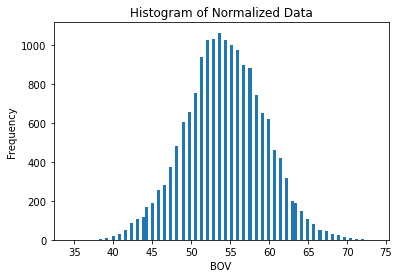

In [64]:
# Create a histogram with 20 bins
plt.hist(numeric_x["BOV"], bins=100)

# Add titles and labels
plt.title('Histogram of Normalized Data')
plt.xlabel('BOV')
plt.ylabel('Frequency')
plt.show()

In [24]:
correlation = numeric_x.corr()
cols_to_drop = []
drop_next = False
for i in range(len(correlation.columns)):
    if drop_next:
        drop_next = False
        continue
    for j in range(i+1, len(correlation)):
        if correlation.iloc[i,j] == 1.0:
            pass
        elif correlation.iloc[i,j] > 0.9:
            cols_to_drop.append(correlation.columns[i])
            drop_next = True
            break

if not cols_to_drop:
    print('\033[1m' + "There are no high-correlation columns, thus no column was dropped." + '\033[1m')
else:
    numeric_x = numeric_x.drop(columns=cols_to_drop)
    print('\033[1m' + "The following high-correlation columns should were dropped: " + '\033[1m', cols_to_drop)
    print("""""")
    print("New numerical data: ")
    display(numeric_x)

The following high-correlation columns should were dropped:  ['Dribbling', 'Movement', 'Mentality', 'Positioning', 'Marking', 'DEF', 'ST', 'CF', 'CAM', 'CM', 'LDM', 'LB']

New numerical data: 


Age        BOV     Height    Weight    Growth     Value      Wage  \
0      2.333615  56.738223  49.493996  6.821946  2.333367  7.838821  6.238182   
1      2.380795  55.975537  48.240030  6.429831  2.333367  7.826237  6.238182   
2      2.333615  56.738223  47.611580  6.625952  2.333367  8.618379  6.588086   
3      2.369619  55.975537  48.867497  6.666839  4.319479  8.693592  6.428565   
4      2.369619  65.084741  46.351670  6.508606  2.333367  8.976722  6.487957   
...         ...        ...        ...       ...       ...       ...       ...   
17120  2.155150  52.917746  53.233489  6.666839  2.155803  7.799264  5.611854   
17121  2.059924  46.765866  48.240030  6.716713  3.525799  7.320563  5.821854   
17122  2.059924  45.219710  47.611580  6.552147  3.741292  7.320563  5.611854   
17123  2.110516  49.848127  47.611580  6.486442  3.741292  7.753345  5.821854   
17124  2.059924  49.078782  48.240030  6.552147  4.493990  7.631685  5.611854   

       Release Clause    Crossing  Heading Accuracy     Volleys       Curve  \
0           39.399598  519.861971        623.109242   72.513003  126.747417   
1           34.216444  446.511318        659.693264   86.225829  160.598829   
2           39.399598  574.633760        334.145282   95.918307  173.004936   
3           39.399598  312.146481        641.293042   54.764075   90.802048   
4           42.021139  519.861971        535.474429  101.488354  163.067413   
...               ...         ...               ...         ...         ...   
17120       39.399598  159.053626        754.905193   30.039964   41.404026   
17121       21.996796  276.967760        469.376742   49.632122   74.495949   
17122       21.996796  321.171883        518.612227   40.405603   76.665051   
17123       25.111283  386.851042        501.974378   26.211763   76.665051   
17124       25.126978  138.340044        623.109242   67.076579   81.034396   

       FK Accuracy  Long Passing  Sprint Speed      Agility   Reactions  \
0        34.968870    799.195128   4688.176875  1951.932488  209.911868   
1        44.262983    839.115074   2025.133541  1629.422698  193.813258   
2        43.304106    799.195128   1394.141014  2123.828737  170.278947   
3        27.800399    702.942079   3209.860895  1754.135884  155.019643   
4        39.913982   1095.221455   2581.311194  2616.773921  234.641503   
...            ...           ...           ...          ...         ...   
17120    20.803175    238.750723   2483.618707   908.988344  129.201530   
17121    29.881985    647.658808   3321.730109  1155.255235  151.260901   
17122    21.356104    263.244600   3100.031261  1243.730952  170.278947   
17123    27.800399    576.882541   4162.301586  2302.800440  158.801086   
17124    28.844852    192.765634   4421.073309  1478.839037  147.525141   

           Balance         Power  Shot Power      Jumping      Stamina  \
0      1599.125107  89046.968991  590.769067   946.852023  2925.748078   
1      1782.697363  77245.658833  603.532778   631.173239  2506.594458   
2      1926.562194  58781.335699  565.546685   715.736526   492.274028   
3      1446.116939  41107.783595  457.197100   873.408726  1571.713825   
4      1926.562194  64496.470514  504.297365   372.176421  2047.398290   
...            ...           ...         ...          ...          ...   
17120   639.650761  56656.210284  296.424152   996.384236  2120.623459   
17121  1599.125107  53340.180320  326.498380   804.840358  1701.049022   
17122  1599.125107  38997.180027  125.398945   782.142805  1701.049022   
17123  2025.405610  49340.525163  326.498380  1047.000980  1975.493269   
17124  1467.660910  60510.615073  400.766658   804.840358  1835.638586   

         Strength  Aggression      Vision   Penalties    Composure  \
0      830.772753  362.090908  345.388150  126.870774   614.203328   
1      669.571752  354.719134  401.504609  216.175597  1028.302794   
2      594.495281  340.121212  409.745324  182.766738   614.203328   
3      789.111882  2

In [25]:
Y

0        69
1        71
2        71
3        82
4        81
         ..
17120    69
17121    66
17122    67
17123    73
17124    74
Name: POT, Length: 17125, dtype: int64

In [26]:
Y.value_counts()

72    1286
73    1266
75    1156
70    1148
71    1145
74    1144
69     963
76     847
68     846
67     780
77     759
78     696
66     631
65     599
79     552
64     516
80     485
81     358
82     292
63     274
83     250
62     192
84     161
85     133
61     125
86      92
60      82
87      69
88      52
59      49
58      36
89      29
57      19
90      19
56      18
55      13
91      12
93       7
92       5
52       5
54       4
48       3
50       3
95       1
53       1
49       1
47       1
Name: POT, dtype: int64

In [27]:
name = categoric["Name"]

In [28]:
categoric = categoric.drop(["Name"],axis=1)

In [29]:
for col in categoric.columns:
    print(col,"| number of unique values: ",categoric[col].nunique())

Nationality | number of unique values:  167
Club | number of unique values:  917
BP | number of unique values:  15
Position | number of unique values:  622
foot | number of unique values:  2
A/W | number of unique values:  3
D/W | number of unique values:  3


In [30]:
one_hot_names = []
for col in categoric.columns:
    col_uniques = sorted(categoric[col].astype(str).unique())
    for unique in col_uniques:
        one_hot_names.append(col+"_"+unique)

In [31]:
categoric_x = pd.DataFrame(OneHotEncoder().fit_transform(categoric.astype(str)).toarray())
categoric_x.columns = one_hot_names

In [32]:
categoric_x

Nationality_Afghanistan  Nationality_Albania  Nationality_Algeria  \
0                          0.0                  0.0                  0.0   
1                          0.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
17120                      0.0                  0.0                  0.0   
17121                      0.0                  0.0                  0.0   
17122                      0.0                  0.0                  0.0   
17123                      0.0                  0.0                  0.0   
17124                      0.0                  0.0                  0.0   

       Nationality_Andorra  Nationality_Angola  \
0                      0.0                 0.0   
1                      0.0                 0.0   
2                      0.0                 0.0   
3                      0.0                 0.0   
4                      0.0                 0.0   
...                    ...                 ...   
17120                  0.0                 0.0   
17121                  0.0                 0.0   
17122                  0.0                 0.0   
17123                  0.0                 0.0   
17124                  0.0                 0.0   

       Nationality_Antigua &amp; Barbuda  Nationality_Argentina  \
0                                    0.0                    0.0   
1                                    0.0                    0.0   
2                                    0.0                    0.0   
3                                    0.0                    0.0   
4                                    0.0                    0.0   
...                                  ...                    ...   
17120                                0.0                    0.0   
17121                                0.0                    0.0   
17122                                0.0                    0.0   
17123                                0.0                    0.0   
17124                                0.0                    0.0   

       Nationality_Armenia  Nationality_Aruba  Nationality_Australia  \
0                      0.0                0.0                    0.0   
1                      0.0                0.0                    0.0   
2                      0.0                0.0                    0.0   
3                      0.0                0.0                    0.0   
4                      0.0                0.0                    0.0   
...                    ...                ...                    ...   
17120                  0.0                0.0                    0.0   
17121                  0.0                0.0                    0.0   
17122                  0.0                0.0                    0.0   
17123                  0.0                0.0                    0.0   
17124                  0.0                0.0                    0.0   

       Nationality_Austria  Nationality_Azerbaijan  Nationality_Barbados  \
0                      0.0                     0.0                   0.0   
1                      0.0                     0.0                   0.0   
2                      0.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   0.0   
...                    ...                     ...                   ...   
17120                  0.0                     0.0                   0.0   
17121                  0.0                     0.0                   0.0   
17122                  0.0                     0.0                   0.0   
17123                  0.0                     0.0             

In [33]:
data_x=pd.DataFrame(np.concatenate((numeric_x,categoric_x),axis=1)).reset_index(drop=True)
data_x.columns = list(numeric_x.columns) + list(categoric_x.columns)
data_x

Age        BOV     Height    Weight    Growth     Value      Wage  \
0      2.333615  56.738223  49.493996  6.821946  2.333367  7.838821  6.238182   
1      2.380795  55.975537  48.240030  6.429831  2.333367  7.826237  6.238182   
2      2.333615  56.738223  47.611580  6.625952  2.333367  8.618379  6.588086   
3      2.369619  55.975537  48.867497  6.666839  4.319479  8.693592  6.428565   
4      2.369619  65.084741  46.351670  6.508606  2.333367  8.976722  6.487957   
...         ...        ...        ...       ...       ...       ...       ...   
17120  2.155150  52.917746  53.233489  6.666839  2.155803  7.799264  5.611854   
17121  2.059924  46.765866  48.240030  6.716713  3.525799  7.320563  5.821854   
17122  2.059924  45.219710  47.611580  6.552147  3.741292  7.320563  5.611854   
17123  2.110516  49.848127  47.611580  6.486442  3.741292  7.753345  5.821854   
17124  2.059924  49.078782  48.240030  6.552147  4.493990  7.631685  5.611854   

       Release Clause    Crossing  Heading Accuracy     Volleys       Curve  \
0           39.399598  519.861971        623.109242   72.513003  126.747417   
1           34.216444  446.511318        659.693264   86.225829  160.598829   
2           39.399598  574.633760        334.145282   95.918307  173.004936   
3           39.399598  312.146481        641.293042   54.764075   90.802048   
4           42.021139  519.861971        535.474429  101.488354  163.067413   
...               ...         ...               ...         ...         ...   
17120       39.399598  159.053626        754.905193   30.039964   41.404026   
17121       21.996796  276.967760        469.376742   49.632122   74.495949   
17122       21.996796  321.171883        518.612227   40.405603   76.665051   
17123       25.111283  386.851042        501.974378   26.211763   76.665051   
17124       25.126978  138.340044        623.109242   67.076579   81.034396   

       FK Accuracy  Long Passing  Sprint Speed      Agility   Reactions  \
0        34.968870    799.195128   4688.176875  1951.932488  209.911868   
1        44.262983    839.115074   2025.133541  1629.422698  193.813258   
2        43.304106    799.195128   1394.141014  2123.828737  170.278947   
3        27.800399    702.942079   3209.860895  1754.135884  155.019643   
4        39.913982   1095.221455   2581.311194  2616.773921  234.641503   
...            ...           ...           ...          ...         ...   
17120    20.803175    238.750723   2483.618707   908.988344  129.201530   
17121    29.881985    647.658808   3321.730109  1155.255235  151.260901   
17122    21.356104    263.244600   3100.031261  1243.730952  170.278947   
17123    27.800399    576.882541   4162.301586  2302.800440  158.801086   
17124    28.844852    192.765634   4421.073309  1478.839037  147.525141   

           Balance         Power  Shot Power      Jumping      Stamina  \
0      1599.125107  89046.968991  590.769067   946.852023  2925.748078   
1      1782.697363  77245.658833  603.532778   631.173239  2506.594458   
2      1926.562194  58781.335699  565.546685   715.736526   492.274028   
3      1446.116939  41107.783595  457.197100   873.408726  1571.713825   
4      1926.562194  64496.470514  504.297365   372.176421  2047.398290   
...            ...           ...         ...          ...          ...   
17120   639.650761  56656.210284  296.424152   996.384236  2120.623459   
17121  1599.125107  53340.180320  326.498380   804.840358  1701.049022   
17122  1599.125107  38997.180027  125.398945   782.142805  1701.049022   
17123  2025.405610  49340.525163  326.498380  1047.000980  1975.493269   
17124  1467.660910  60510.615073  400.766658   804.840358  1835.638586   

         Strength  Aggression      Vision   Penalties    Composure  \
0      830.772753  362.090908  345.388150  126.870774   614.203328   
1      669.571752  354.719134  401.504609  216.175597  1028.302794   
2      594.495281  340.121212  409.745324  182.766738   614.203328   
3      789.111882  2

In [34]:
x_train, x_test, y_train, y_test = train_test_split(data_x,Y,test_size=0.3,random_state=90)

In [35]:
model = sm.OLS(y_train,x_train).fit()

In [36]:
predictions = model.predict(x_test)

In [37]:
predictions

4771     76.844723
14537    75.807059
16110    73.952021
5581     68.516010
14154    74.008474
           ...    
7933     76.655228
15020    71.490940
5390     77.065469
10454    72.906226
7620     78.368144
Length: 5138, dtype: float64

In [38]:
r2 = r2_score(y_test,predictions)

In [72]:
print("r2 score is: ", r2)

r2 score is:  0.9194643604371451


In [73]:
#comparison between real Y and predictions
comparison=pd.concat([y_test,predictions],axis=1)
comparison.columns=["y_test","predictions"]
comparison=comparison.reset_index()
comparison=comparison.drop(["index"],axis=1)
display(pd.DataFrame(comparison))

y_test  predictions
0         77    76.844723
1         73    75.807059
2         75    73.952021
3         65    68.516010
4         74    74.008474
...      ...          ...
5133      78    76.655228
5134      71    71.490940
5135      76    77.065469
5136      67    72.906226
5137      76    78.368144

[5138 rows x 2 columns]

In [40]:
mse = mean_squared_error(y_test,predictions)

In [41]:
mse

2.7040831415273483

In [42]:
rmse = math.sqrt(mse)

In [43]:
rmse

1.6444096635350172

In [44]:
mae = mean_absolute_error(y_test, predictions)

In [45]:
mae

1.2698053073488529

In [46]:
final = pd.concat([name, categoric],axis=1)
final = pd.concat([final, numeric],axis=1)
final

Name            Nationality           Club   BP  \
0          G. Pasquale                  Italy        Udinese  LWB   
1          Luis García                  Spain      KAS Eupen   CM   
2              J. Cole                England  Coventry City  CAM   
3             D. Yorke  Trinidad &amp; Tobago     Sunderland   ST   
4              Iniesta                  Spain    Vissel Kobe  CAM   
...                ...                    ...            ...  ...   
17120       A. Medioub                 France     CD Tondela   CB   
17121       W. Rickard                  Wales        Burnley  CAM   
17122       C. Barrett                England        Burnley   RB   
17123   J. Gazibegović     Bosnia Herzegovina  SK Sturm Graz   RB   
17124  Pablo Rodríguez                  Spain          Lecce   ST   

           Position   foot     A/W     D/W  Age  BOV  POT  Height  Weight  \
0                LM   Left  Medium    High   33   71   69      72     181   
1        CM CAM CDM  Right  Medium  Medium   37   70   71      70     143   
2      CAM RM RW LM  Right  Medium     Low   33   71   71      69     161   
3               NaN  Right     NaN     NaN   36   70   82      71     165   
4            CM CAM  Right    High  Medium   36   82   81      67     150   
...             ...    ...     ...     ...  ...  ...  ...     ...     ...   
17120            CB  Right  Medium  Medium   22   66   69      78     165   
17121        CAM CM  Right  Medium  Medium   18   58   66      70     170   
17122            RB  Right  Medium  Medium   18   56   67      69     154   
17123         RB LB  Right    High  Medium   20   62   73      69     148   
17124            ST  Right    High  Medium   18   61   74      70     154   

       Growth     Value   Wage  Release Clause  Crossing  Heading Accuracy  \
0           0    625000   7000               0        75                59   
1           0    600000   7000        11000000        68                61   
2           0  11000000  15000               0        80                41   
3          14         0      0               0        54                60   
4           0  55000000  12000        72000000        75                54   
...       ...       ...    ...             ...       ...               ...   
17120       5    550000   2000               0        35                66   
17121      10    130000   3000          273000        50                50   
17122      11    130000   2000          273000        55                53   
17123      11    475000   3000          784000        62                52   
17124      15    325000   2000          788000        32                59   

       Volleys  Dribbling  Curve  FK Accuracy  Long Passing  Movement  \
0           58         73     65           60            69       347   
1           68         69     79           79            71       305   
2           75         79     84           77            69       295   
3            0         68      0           46            64       176   
4           79         85     80           70            83       346   
...        ...        ...    ...          ...           ...       ...   
17120       26         44     26           33            34       243   
17121       41         57     42           50            61       298   
17122       34         52     43           34            36       308   
17123       23         55     43           46            57       349   
17124       54         57     45           48            30       317   

       Sprint Speed  Agility  Reactions  Balance  Power  Shot Power  Jumping  \
0                74       68         69       68    347          74       68   
1                50       62         65       72    324          75       54   
2                42       71         59       75    284          72       58   
3                62        0         55        0    239          63        0   
4                56       79         75       75  

In [47]:
final["POT_predict"]=model.predict(data_x)

In [48]:
final["POT_predict"].isna().value_counts()

False    17125
Name: POT_predict, dtype: int64

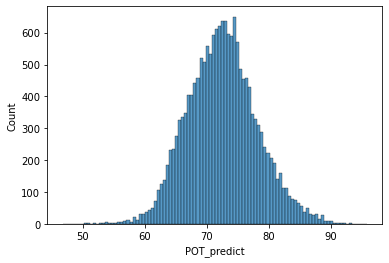

In [49]:
sns.histplot(final["POT_predict"],bins=100)
plt.show()

In [50]:
final = final.reindex(columns=['Name', 'Age',"Club", 'BP',"BOV","POT","POT_predict","Value","Wage","Release Clause","PAC","SHO","PAS","DRI","DEF","PHY"])
final

Name  Age           Club   BP  BOV  POT  POT_predict  \
0          G. Pasquale   33        Udinese  LWB   71   69    70.599345   
1          Luis García   37      KAS Eupen   CM   70   71    66.784740   
2              J. Cole   33  Coventry City  CAM   71   71    71.000000   
3             D. Yorke   36     Sunderland   ST   70   82    74.617712   
4              Iniesta   36    Vissel Kobe  CAM   82   81    78.873639   
...                ...  ...            ...  ...  ...  ...          ...   
17120       A. Medioub   22     CD Tondela   CB   66   69    71.945808   
17121       W. Rickard   18        Burnley  CAM   58   66    70.231684   
17122       C. Barrett   18        Burnley   RB   56   67    69.715638   
17123   J. Gazibegović   20  SK Sturm Graz   RB   62   73    72.730508   
17124  Pablo Rodríguez   18          Lecce   ST   61   74    75.059828   

          Value   Wage  Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
0        625000   7000               0   71   59   70   71   68   69  
1        600000   7000        11000000   53   69   73   69   58   63  
2      11000000  15000               0   45   68   76   77   36   52  
3             0      0               0   61   66   66   69   47   60  
4      55000000  12000        72000000   58   70   85   85   63   59  
...         ...    ...             ...  ...  ...  ...  ...  ...  ...  
17120    550000   2000               0   54   30   37   48   64   69  
17121    130000   3000          273000   62   46   57   56   43   55  
17122    130000   2000          273000   63   35   44   52   54   55  
17123    475000   3000          784000   71   34   58   59   59   54  
17124    325000   2000          788000   70   62   41   57   16   49  

[17125 rows x 16 columns]

In [51]:
top_3 = final.sort_values(by='POT_predict', ascending=False).head(3).reset_index(drop=True)
top_3.index += 1

In [52]:
top_3

Name  Age                 Club   BP  BOV  POT  POT_predict  \
1      J. Sancho   20    Borussia Dortmund  CAM   89   93    95.768758   
2      K. Mbappé   21  Paris Saint-Germain   ST   91   95    94.474210   
3  G. Donnarumma   21                Milan   GK   85   92    94.196970   

        Value    Wage  Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
1   695000000   82000      1321000000   83   74   81   91   37   64  
2  1055000000  160000      2031000000   96   86   78   91   39   76  
3   415000000   34000       789000000   89   81   76   89   50   83

In [53]:
top_3_youngsters = final[final['Age'] < 20].sort_values(by='POT_predict', ascending=False).head(3).reset_index(drop=True)
top_3_youngsters.index += 1

In [54]:
top_3_youngsters

Name  Age               Club  BP  BOV  POT  POT_predict      Value  \
1    E. Haaland   19  Borussia Dortmund  ST   85   92    93.016577   45000000   
2  Vinícius Jr.   19        Real Madrid  RM   81   93    92.783490  275000000   
3       Rodrygo   19        Real Madrid  RM   80   90    90.956341   21000000   

    Wage  Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
1  56000       855000000   84   87   63   76   43   85  
2  95000       736000000   95   69   71   87   29   66  
3  90000       473000000   87   75   70   83   32   57

In [55]:
top20=final.sort_values(by='POT_predict', ascending=False).head(30).reset_index(drop=True)
top20.index += 1
top20

Name  Age                 Club   BP  BOV  POT  POT_predict  \
1             J. Sancho   20    Borussia Dortmund  CAM   89   93    95.768758   
2             K. Mbappé   21  Paris Saint-Germain   ST   91   95    94.474210   
3         G. Donnarumma   21                Milan   GK   85   92    94.196970   
4            M. de Ligt   20             Juventus   CB   87   92    93.766306   
5   T. Alexander-Arnold   21            Liverpool   RB   87   92    93.034246   
6            E. Haaland   19    Borussia Dortmund   ST   85   92    93.016577   
7          Vinícius Jr.   19          Real Madrid   RM   81   93    92.783490   
8            K. Havertz   21              Chelsea  CAM   87   93    92.327463   
9              J. Oblak   27      Atlético Madrid   GK   91   93    92.178008   
10        M. ter Stegen   28         FC Barcelona   GK   90   93    91.862405   
11            Neymar Jr   28  Paris Saint-Germain   LW   91   91    91.727317   
12             L. Messi   33         FC Barcelona   RW   93   93    91.648912   
13           B. Ronhaar   23          Netherlands   CF   88   90    91.524478   
14          M. Rashford   22    Manchester United   RM   86   91    91.394575   
15          L. Martínez   22                Inter   ST   86   91    91.248424   
16              Rodrygo   19          Real Madrid   RM   80   90    90.956341   
17           João Félix   20      Atlético Madrid  CAM   83   93    90.859925   
18            A. Davies   19    FC Bayern München   LB   81   89    90.762203   
19             Casemiro   28          Real Madrid  CDM   89   89    90.594114   
20           F. de Jong   23         FC Barcelona   CM   87   90    90.342436   
21             M. Salah   28            Liverpool   RW   90   90    90.303648   
22         K. De Bruyne   29      Manchester City  CAM   91   91    90.290675   
23            Ansu Fati   17         FC Barcelona   LW   76   90    90.197858   
24          M. Ødegaard   21          Real Madrid  CAM   85   89    90.109684   
25         M. Greenwood   18    Manchester United  CAM   78   89    90.060747   
26              S. Mané   28            Liverpool   LW   90   90    90.016306   
27           O. Dembélé   23         FC Barcelona   LM   85   89    89.933269   
28              Alisson   27            Liverpool   GK   90   91    89.886985   
29              Ederson   26      Manchester City   GK   88   91    89.797787   
30               Malcom   21         FC Barcelona  CAM   82   89    89.787055   

         Value    Wage  Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
1    695000000   82000      1321000000   83   74   81   91   37   64  
2   1055000000  160000      2031000000   96   86   78   91   39   76  
3    415000000   34000       789000000   89   81   76   89   50   83  
4    495000000   80000       916000000   72   59   66   69   85   84  
5     60000000  110000      1155000000   80   66   87   80   80   71  
6     45000000   56000       855000000   84   87   63   76   43   85  
7    275000000   95000       736000000   95   69   71   87   29   66  
8     57000000  105000      1197000000   84   81   79   85   45   67  
9     75000000  125000      1594000000   87   92   78   90   52   90  
10   695000000  260000      1477000000   88   85   88   90   45   88  
11    90000000  270000      1665000000   91   85   86   94   36   59  
12   675000000  560000      1384000000   85   92   91   95   38   65  
13           0       0               0   93   71   83   89   37   65  
14    53000000  150000      1113000000   91   83   78   86   45   78  
15   445000000  130000       823000000   83   82   71   85   48   82  
16    21000000   90000       473000000   87   75   70   83   32   57  
17    32000000   51000        72000000   81   81   74   83   40   69  
18   225000000   40000       416000000   96   67   69   83   76   76  
19   595000000  310000       122000000   65   73   76   72   86   91  
20   505000000  190000      1073000000   80   64   84   87   76   77  
21    78000000  

In [56]:
top_3_bargains = final[final['Value'] <= 1000000].sort_values(by='POT_predict', ascending=False).head(3).reset_index(drop=True)
top_3_bargains.index += 1

In [57]:
top_3_bargains

Name  Age         Club  BP  BOV  POT  POT_predict  Value  Wage  \
1      B. Ronhaar   23  Netherlands  CF   88   90    91.524478      0     0   
2  H. de Noteboom   32  Netherlands  ST   89   90    89.098013      0     0   
3       J. Maatje   33  Netherlands  ST   85   91    88.307181      0     0   

   Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
1               0   93   71   83   89   37   65  
2               0   85   88   68   85   55   80  
3               0   86   90   58   78   45   68

In [58]:
top_3_bargainsyoung = final[(final['Value'] <= 2000000)&(final['Age'] < 20)
                           ].sort_values(by='POT_predict', ascending=False).head(3).reset_index(drop=True)
top_3_bargainsyoung.index += 1
top_3_bargainsyoung=top_3_bargainsyoung.drop(["Wage","Release Clause","PAC","SHO","PAS","DRI","DEF","PHY"],axis=1)

In [59]:
top_3_bargainsyoung

Name  Age            Club   BP  BOV  POT  POT_predict    Value
1      M. Kana   17  RSC Anderlecht  CDM   67   85    84.860517  1000000
2  J. Gvardiol   18   Dinamo Zagreb   CB   71   86    84.325366  2000000
3     Y. Demir   17   SK Rapid Wien  CAM   66   85    83.477993   975000

In [60]:
top_3_free = final[(final['Value'] == 0)&(final['Age'] < 23)].sort_values(by='POT_predict', ascending=False).head(3).reset_index(drop=True)
top_3_free.index+=1
top_3_free

Name  Age     Club   BP  BOV  POT  POT_predict  Value  Wage  \
1  Welington Dano   20   Brazil   LB   81   81    84.486595      0     0   
2    S. Szymański   21   Poland  CAM   70   83    82.752299      0     0   
3      Fábio Paim   20  Chelsea   CF   70   78    82.444591      0     0   

   Release Clause  PAC  SHO  PAS  DRI  DEF  PHY  
1               0   79   54   76   78   75   74  
2               0   84   61   66   73   30   46  
3               0   81   53   59   78   34   52

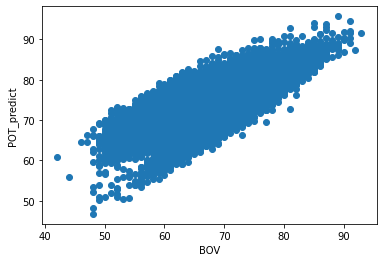

In [61]:
plt.scatter(final["BOV"], final["POT_predict"])
plt.xlabel("BOV")
plt.ylabel("POT_predict")
plt.show()

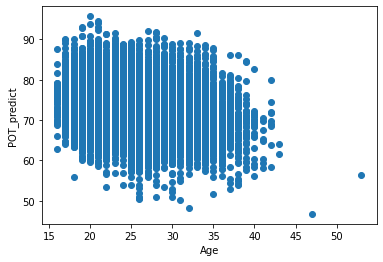

In [62]:
plt.scatter(final["Age"], final["POT_predict"])
plt.xlabel("Age")
plt.ylabel("POT_predict")
plt.show()

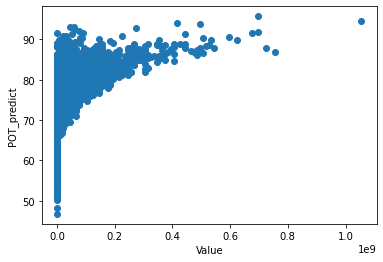

In [63]:
# plot the scatter plot
plt.scatter(final["Value"], final["POT_predict"])

# set the labels for the plot
plt.xlabel("Value")
plt.ylabel("POT_predict")

# display the plot
plt.show()

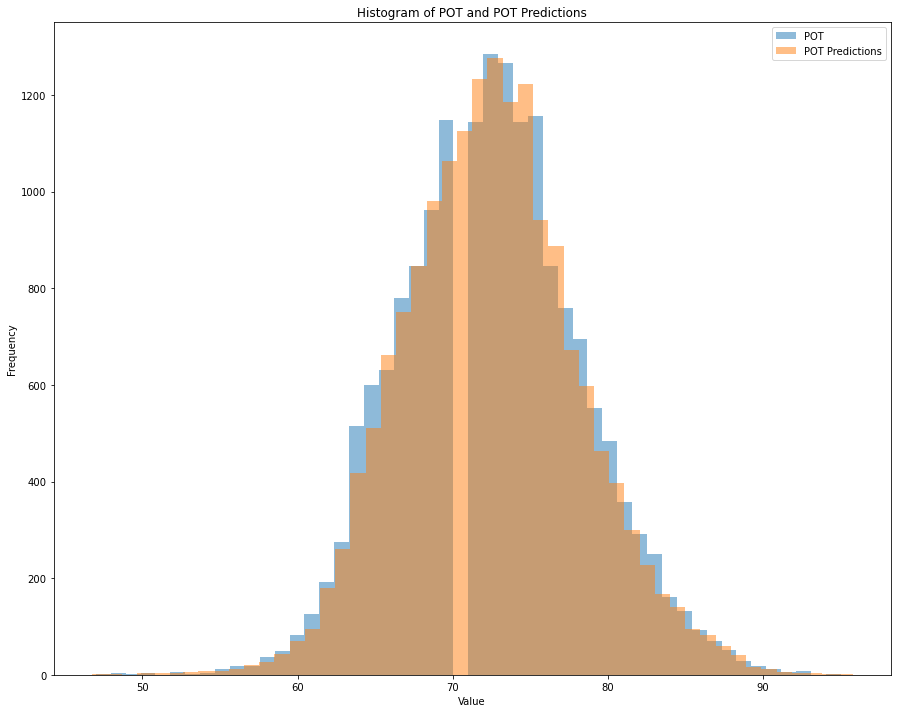

In [76]:
plt.figure(figsize=(15, 12))

# Create a histogram of both datasets on the same chart
plt.hist(final["POT"], bins=50, alpha=0.5, label='POT')
plt.hist(final["POT_predict"], bins=50, alpha=0.5, label='POT Predictions')

# Add title and labels
plt.title('Histogram of POT and POT Predictions')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

In [88]:
numeric_f = pd.concat([numeric, final["POT_predict"]],axis=1)
numeric_f

Age  BOV  POT  Height  Weight  Growth     Value   Wage  Release Clause  \
0       33   71   69      72     181       0    625000   7000               0   
1       37   70   71      70     143       0    600000   7000        11000000   
2       33   71   71      69     161       0  11000000  15000               0   
3       36   70   82      71     165      14         0      0               0   
4       36   82   81      67     150       0  55000000  12000        72000000   
...    ...  ...  ...     ...     ...     ...       ...    ...             ...   
17120   22   66   69      78     165       5    550000   2000               0   
17121   18   58   66      70     170      10    130000   3000          273000   
17122   18   56   67      69     154      11    130000   2000          273000   
17123   20   62   73      69     148      11    475000   3000          784000   
17124   18   61   74      70     154      15    325000   2000          788000   

       Crossing  Heading Accuracy  Volleys  Dribbling  Curve  FK Accuracy  \
0            75                59       58         73     65           60   
1            68                61       68         69     79           79   
2            80                41       75         79     84           77   
3            54                60        0         68      0           46   
4            75                54       79         85     80           70   
...         ...               ...      ...        ...    ...          ...   
17120        35                66       26         44     26           33   
17121        50                50       41         57     42           50   
17122        55                53       34         52     43           34   
17123        62                52       23         55     43           46   
17124        32                59       54         57     45           48   

       Long Passing  Movement  Sprint Speed  Agility  Reactions  Balance  \
0                69       347            74       68         69       68   
1                71       305            50       62         65       72   
2                69       295            42       71         59       75   
3                64       176            62        0         55        0   
4                83       346            56       79         75       75   
...             ...       ...           ...      ...        ...      ...   
17120            34       243            55       46         48       42   
17121            61       298            63       52         54       68   
17122            36       308            61       54         59       68   
17123            57       349            70       74         56       77   
17124            30       317            72       59         53       65   

       Power  Shot Power  Jumping  Stamina  Strength  Mentality  Aggression  \
0        347          74       68       69        68        320          72   
1        324          75       54       64        60        362          71   
2        284          72       58       29        56        317          69   
3        239          63        0       51        66        271          59   
4        297          67       40       58        62        370          58   
...      ...         ...      ...      ...       ...        ...         ...   
17120    279          48       70       59        74        218          69   
17121    271          51       62       53        57        259          51   
17122    233          28       61       53        54        256          58   
17123    261          51       72       57        48        257          61   
17124    288          58       62       55        52        224          32   

       Positioning  Vision  Penalties  Composure  Marking  Sliding Tackle  \
0               63      66         50          0       70              69   
1               72      73         75         79       70              40   
2               

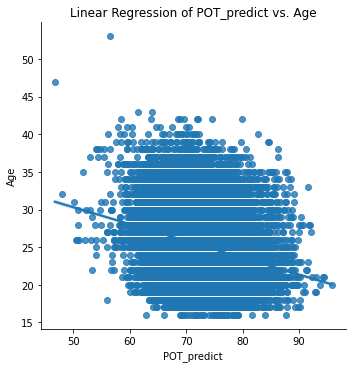

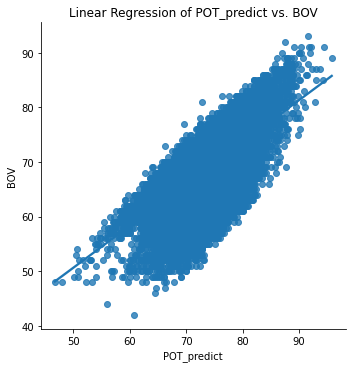

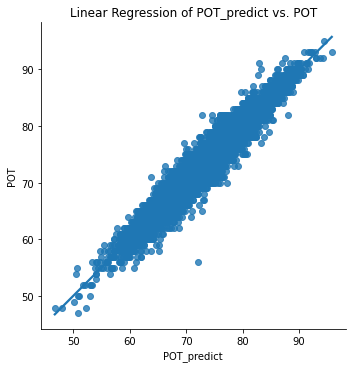

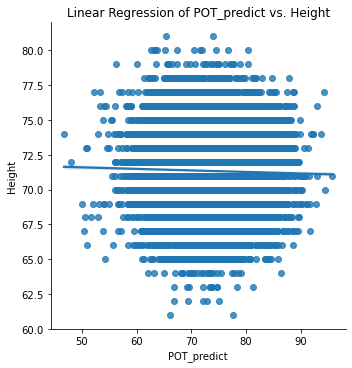

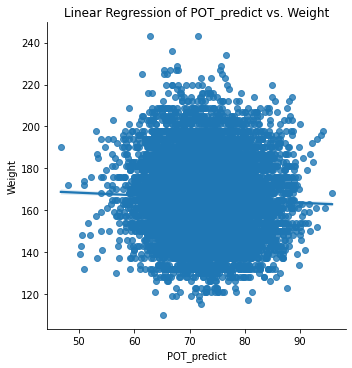

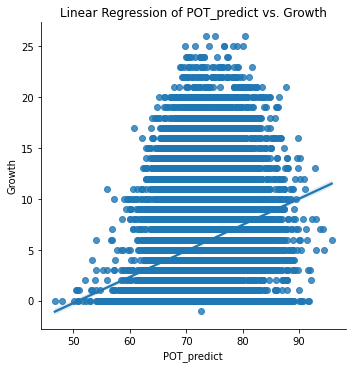

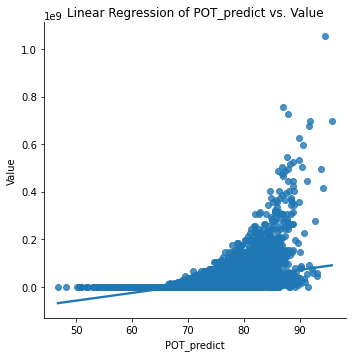

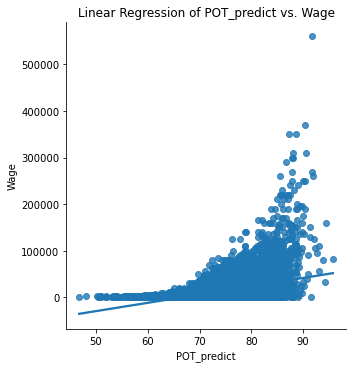

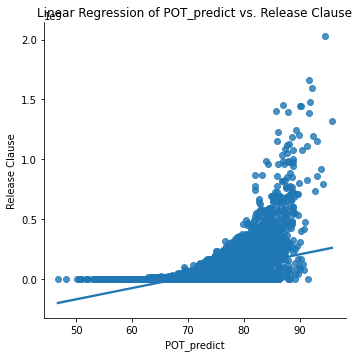

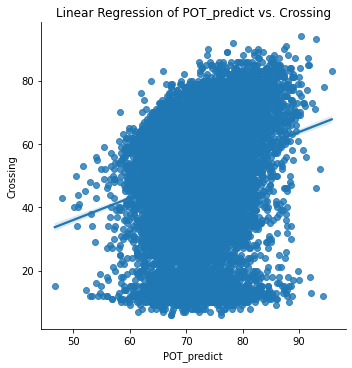

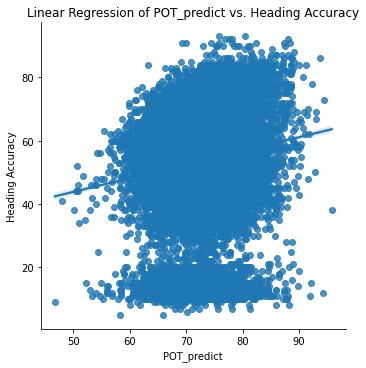

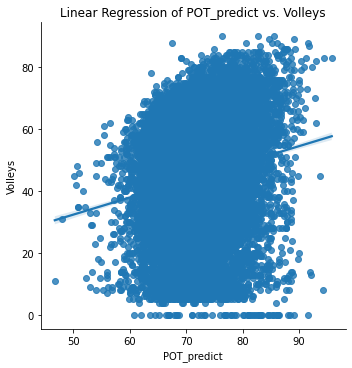

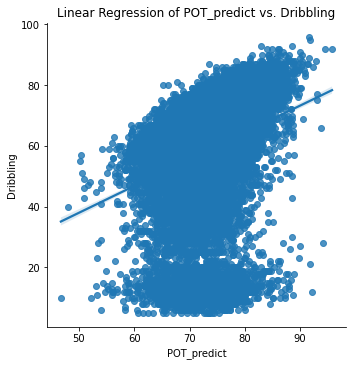

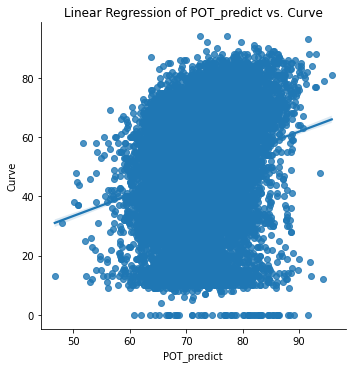

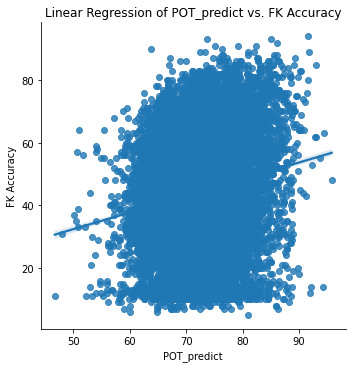

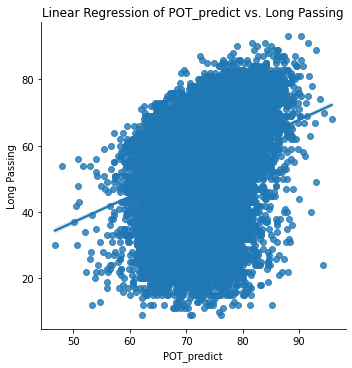

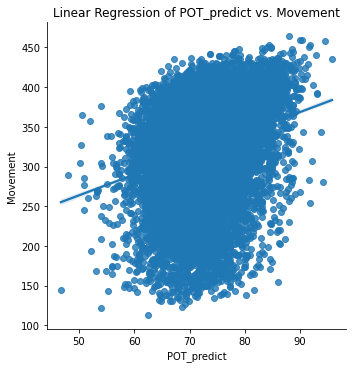

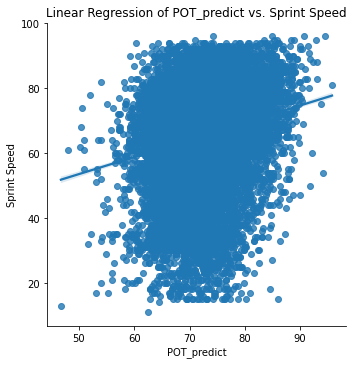

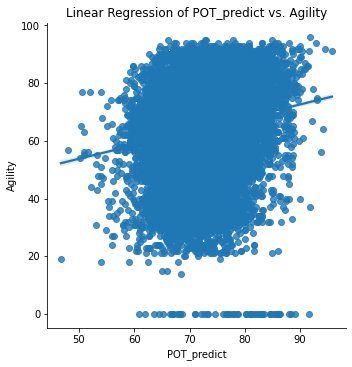

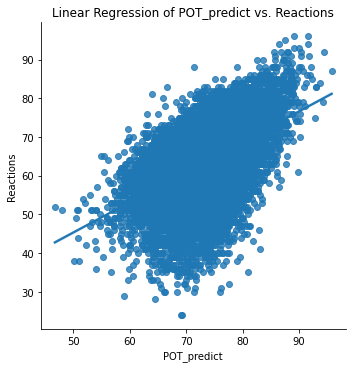

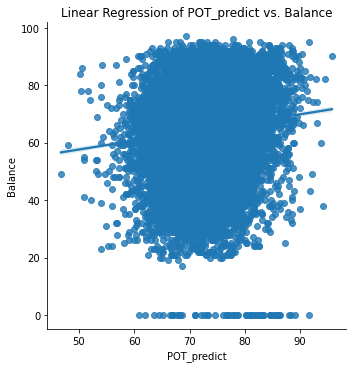

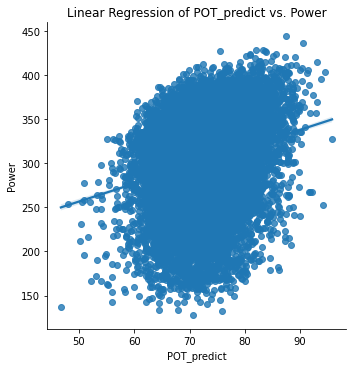

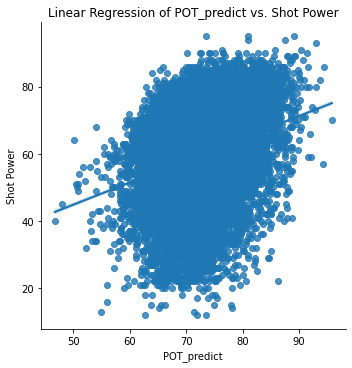

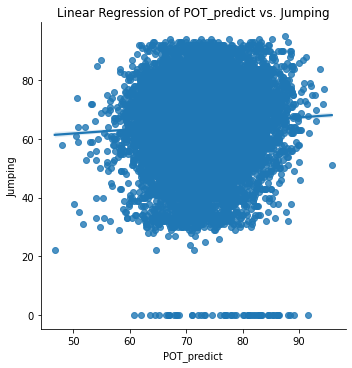

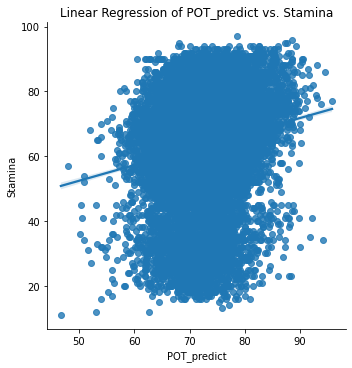

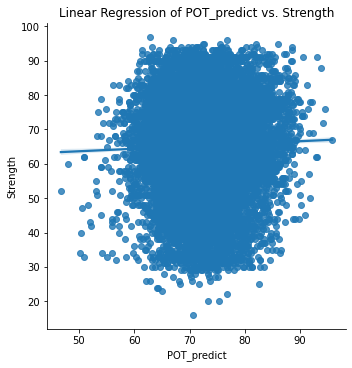

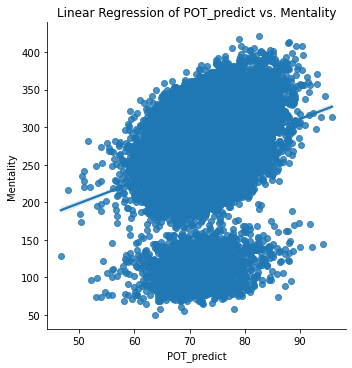

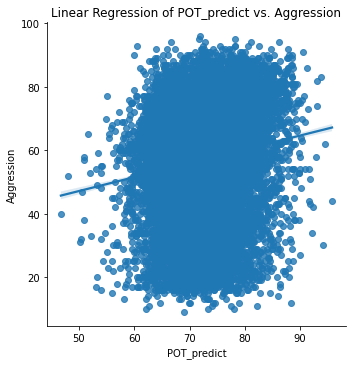

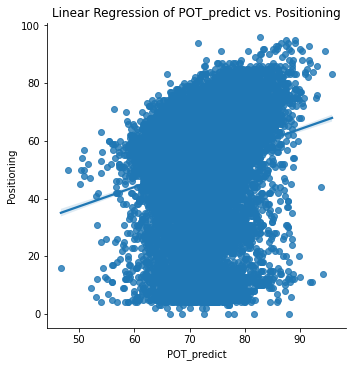

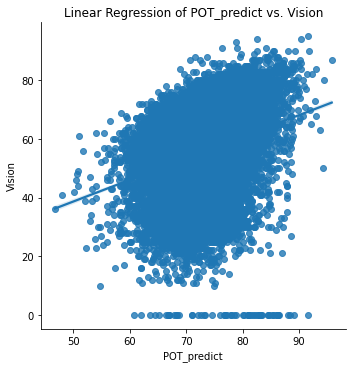

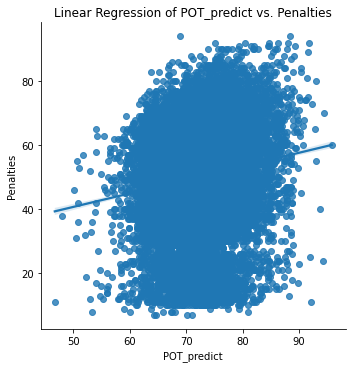

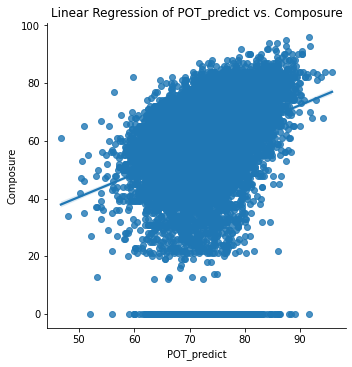

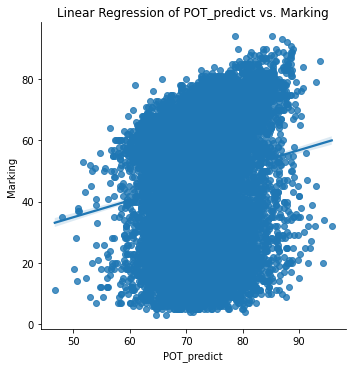

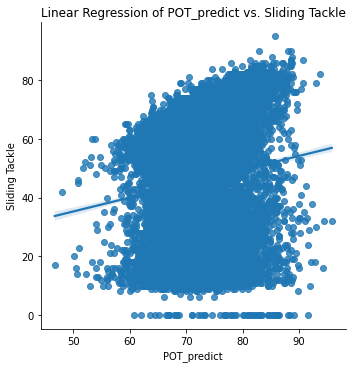

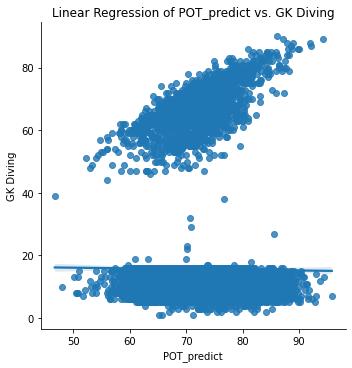

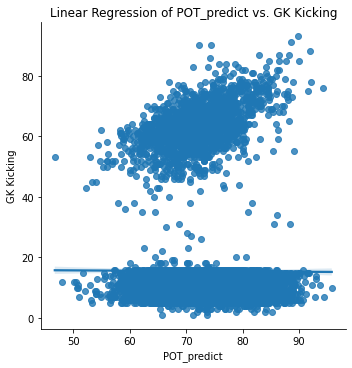

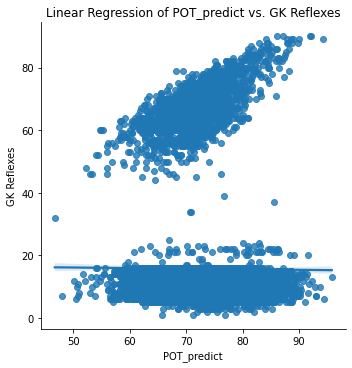

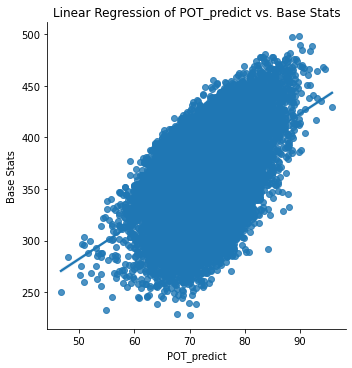

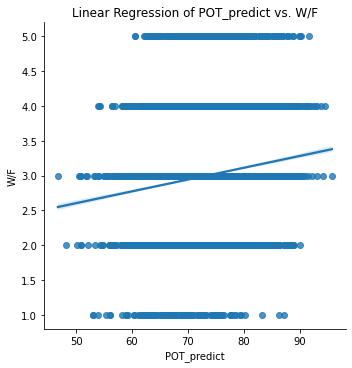

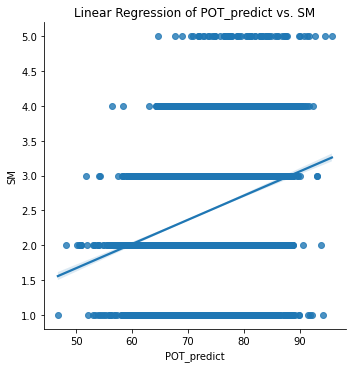

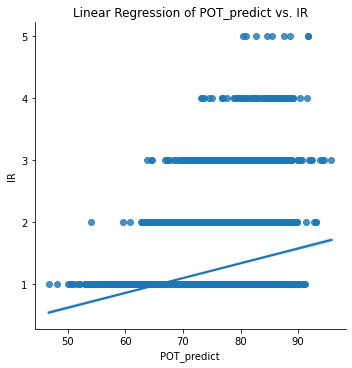

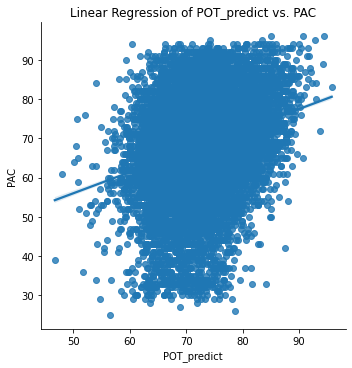

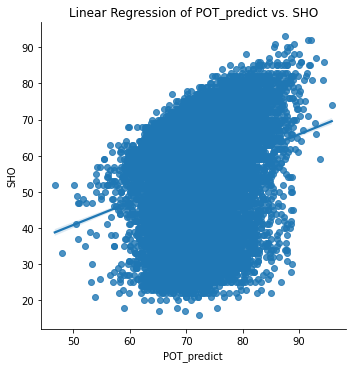

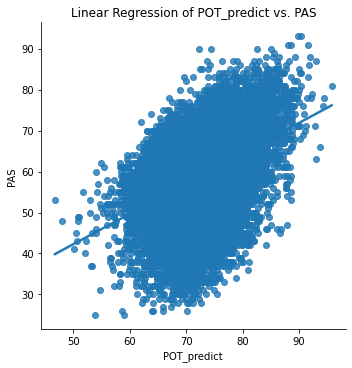

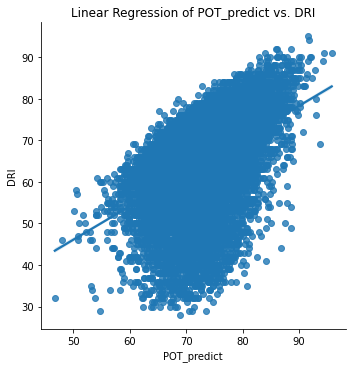

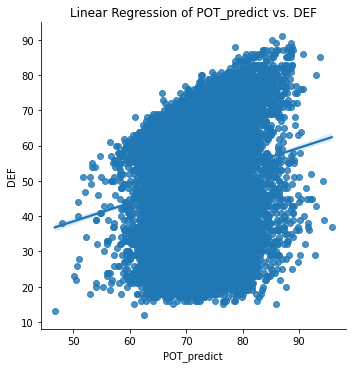

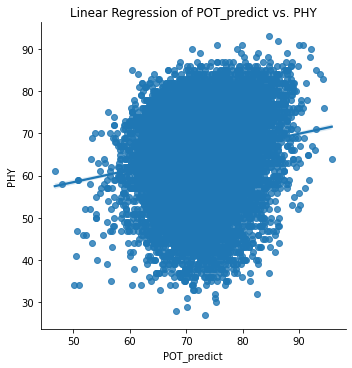

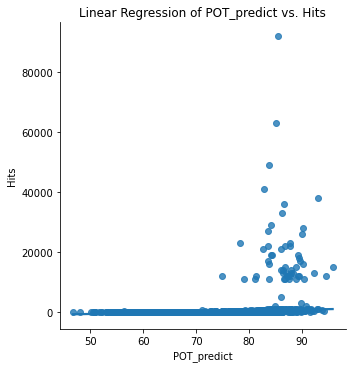

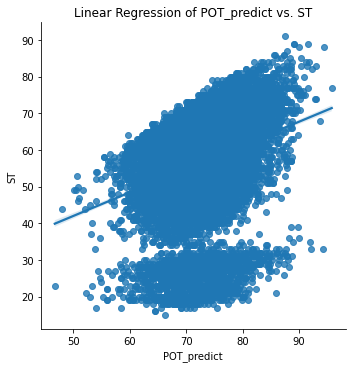

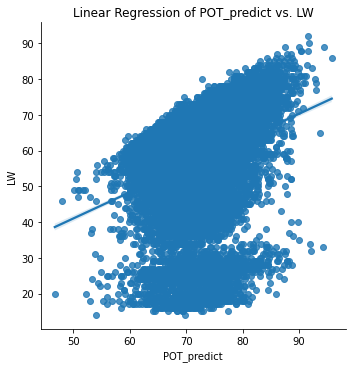

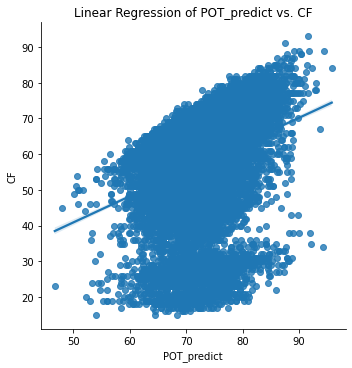

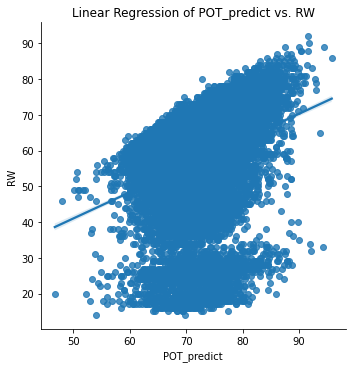

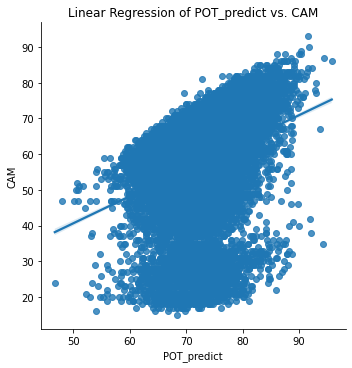

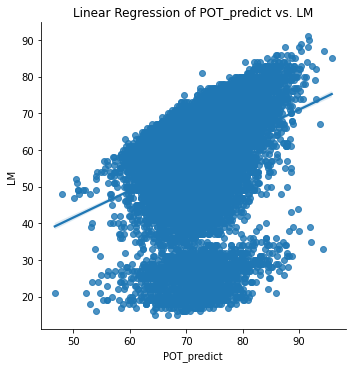

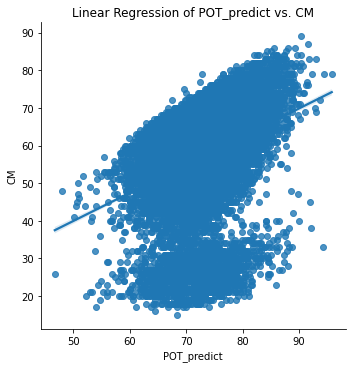

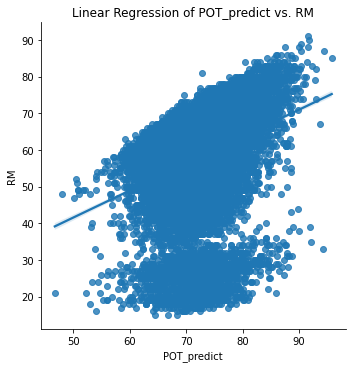

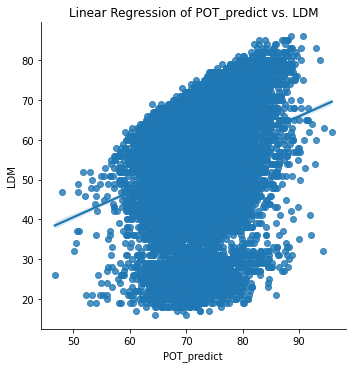

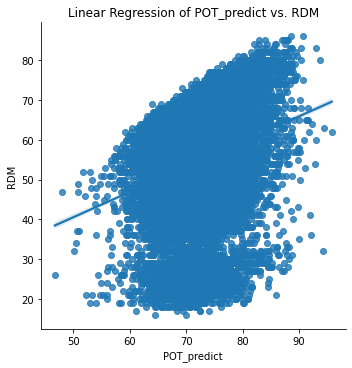

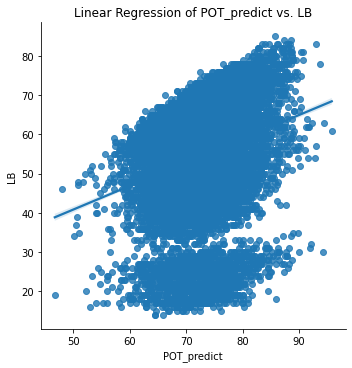

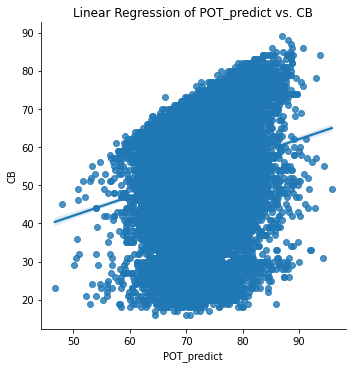

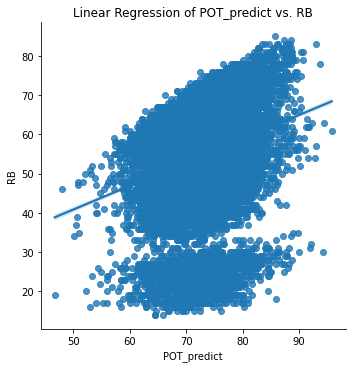

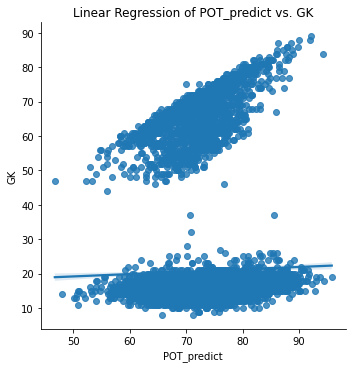

In [89]:
# Get the names of all columns except 'POT_predict'
cols = [col for col in numeric_f.columns if col != 'POT_predict']

# Create a linear regression line chart for each column against 'POT_predict'
for col in cols:
    sns.lmplot(x='POT_predict', y=col, data=numeric_f)
    plt.title('Linear Regression of POT_predict vs. {}'.format(col))
    plt.xlabel('POT_predict')
    plt.ylabel(col)
    plt.show()